# Logistic Regression Penalty Function

In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [35]:
# Parameters
learning_rate = 0.01
training_epochs = 200
batch_size = 100
display_step = 10

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1)) 

# regularized cost
beta = 0.01
L2_pen = beta * tf.reduce_sum(W**2)# tf.nn.l2_loss(W) 
L2_cost = cost + L2_pen
L1_pen = beta * tf.reduce_sum(tf.abs(W))
L1_cost = cost + L1_pen

# Gradient Descent
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(L2_cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(L1_cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [36]:
# Start training
CV_accuracy = []
CV_epoch = []
train_cost = []
CV_cost = []
test_accuracy = []

total_batch = int(mnist.train.num_examples/batch_size)

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.        
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            
            # Compute average loss
            avg_cost += c / total_batch
        
        # Add training and CV cost to plot
        train_cost = train_cost + [avg_cost]
        CV_cost = CV_cost + [sess.run(cost, feed_dict = {x: mnist.validation.images, y: mnist.validation.labels})]
        
        # Display loss per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost), "pen=", str(L2_pen.eval()))

        if ((epoch+1)%10 == 0):
            # Test model
            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            
            # Calculate accuracy for CV and test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            cv_acc = accuracy.eval({x: mnist.validation.images, y: mnist.validation.labels})
            test_acc = accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
            CV_accuracy = CV_accuracy + [cv_acc]
            CV_epoch = CV_epoch + [epoch]
            test_accuracy = test_accuracy + [test_acc]

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy for test examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Test Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0010 cost= 0.491011518 pen= 0.185976
Epoch: 0020 cost= 0.478627821 pen= 0.193715
Epoch: 0030 cost= 0.472601430 pen= 0.194456
Epoch: 0040 cost= 0.473570486 pen= 0.194373
Epoch: 0050 cost= 0.470135941 pen= 0.194219
Epoch: 0060 cost= 0.472724662 pen= 0.194007
Epoch: 0070 cost= 0.471334191 pen= 0.194029
Epoch: 0080 cost= 0.470399043 pen= 0.194013
Epoch: 0090 cost= 0.470395019 pen= 0.193965
Epoch: 0100 cost= 0.468146235 pen= 0.193845
Epoch: 0110 cost= 0.469396983 pen= 0.194058
Epoch: 0120 cost= 0.470312218 pen= 0.194083
Epoch: 0130 cost= 0.469118983 pen= 0.194122
Epoch: 0140 cost= 0.469971132 pen= 0.194078
Epoch: 0150 cost= 0.466941724 pen= 0.194166
Epoch: 0160 cost= 0.468501817 pen= 0.194119
Epoch: 0170 cost= 0.468419028 pen= 0.194102
Epoch: 0180 cost= 0.468339991 pen= 0.194077
Epoch: 0190 cost= 0.470099216 pen= 0.194041
Epoch: 0200 cost= 0.471474575 pen= 0.194023
Test Accuracy: 0.8986


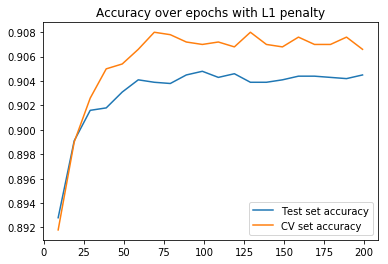

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(CV_epoch[:20], test_accuracy[:20], label="Test set accuracy")
plt.plot(CV_epoch[:20], CV_accuracy[:20], label="CV set accuracy")
plt.title("Accuracy over epochs with L1 penalty")
plt.legend()

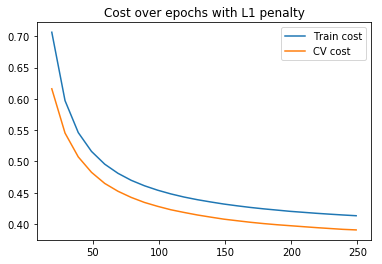

In [22]:
plt.plot(CV_epoch[1:25], train_cost[1:25], label="Train cost")
plt.plot(CV_epoch[1:25], CV_cost[1:25], label="CV cost")
plt.title("Cost over epochs with L1 penalty")
plt.legend()

L1
beta=0.001
Epoch: 0010 cost= 0.454069288 pen= 200.662
Epoch: 0020 cost= 0.421213801 pen= 210.404
Epoch: 0030 cost= 0.409162148 pen= 213.155
Epoch: 0040 cost= 0.401409863 pen= 214.263
Epoch: 0050 cost= 0.399225405 pen= 215.079
Epoch: 0060 cost= 0.395307039 pen= 215.441
Epoch: 0070 cost= 0.391623295 pen= 215.75
Epoch: 0080 cost= 0.389830092 pen= 215.929
Epoch: 0090 cost= 0.392181656 pen= 216.222
Epoch: 0100 cost= 0.387944622 pen= 216.347
Epoch: 0110 cost= 0.388119785 pen= 216.436
Epoch: 0120 cost= 0.386054274 pen= 216.491
Epoch: 0130 cost= 0.388816547 pen= 216.471
Epoch: 0140 cost= 0.384250124 pen= 216.566
Epoch: 0150 cost= 0.387293101 pen= 216.658
Epoch: 0160 cost= 0.386796795 pen= 216.672
Epoch: 0170 cost= 0.387646286 pen= 216.677
Epoch: 0180 cost= 0.386132776 pen= 216.691
Epoch: 0190 cost= 0.385304325 pen= 216.741
Epoch: 0200 cost= 0.384988306 pen= 216.886
Test Accuracy: 0.9046

beta=0.0005
Epoch: 0010 cost= 0.422528627 pen= 0.120368034363
Epoch: 0020 cost= 0.380266473 pen= 0.13189642334
Epoch: 0030 cost= 0.366055716 pen= 0.136495849609
Epoch: 0040 cost= 0.362372722 pen= 0.138830749512
Epoch: 0050 cost= 0.353613164 pen= 0.14032182312
Epoch: 0060 cost= 0.347802954 pen= 0.141246856689
Epoch: 0070 cost= 0.345619127 pen= 0.14187562561
Epoch: 0080 cost= 0.339770605 pen= 0.142386657715
Epoch: 0090 cost= 0.341558791 pen= 0.142784576416
Epoch: 0100 cost= 0.341217563 pen= 0.143086654663
Epoch: 0110 cost= 0.339145638 pen= 0.143339447021
Epoch: 0120 cost= 0.339679358 pen= 0.143622253418
Epoch: 0130 cost= 0.338116528 pen= 0.14372416687
Epoch: 0140 cost= 0.335343507 pen= 0.143987045288
Epoch: 0150 cost= 0.336994899 pen= 0.144062225342
Epoch: 0160 cost= 0.337097460 pen= 0.144203094482
Epoch: 0170 cost= 0.336711657 pen= 0.144422210693
Epoch: 0180 cost= 0.330704518 pen= 0.144508468628
Epoch: 0190 cost= 0.336872944 pen= 0.144568695068
Epoch: 0200 cost= 0.334263440 pen= 0.144677963257
Test Accuracy: 0.9133

beta=0.0001
Epoch: 0010 cost= 0.394820082 pen= 0.00309557403564
Epoch: 0020 cost= 0.345827429 pen= 0.00378317016602
Epoch: 0030 cost= 0.329941979 pen= 0.00423141052246
Epoch: 0040 cost= 0.313328082 pen= 0.00457337310791
Epoch: 0050 cost= 0.304479661 pen= 0.00485309051514
Epoch: 0060 cost= 0.301126717 pen= 0.00508886657715
Epoch: 0070 cost= 0.293905973 pen= 0.00529627929688
Epoch: 0080 cost= 0.293016880 pen= 0.00548053894043
Epoch: 0090 cost= 0.287074586 pen= 0.00564617919922
Epoch: 0100 cost= 0.284998883 pen= 0.00579772644043
Epoch: 0110 cost= 0.282731671 pen= 0.00593765869141
Epoch: 0120 cost= 0.276602966 pen= 0.00606919799805
Epoch: 0130 cost= 0.278792395 pen= 0.006191796875
Epoch: 0140 cost= 0.275249348 pen= 0.00630723693848
Epoch: 0150 cost= 0.274804026 pen= 0.00641590148926
Epoch: 0160 cost= 0.272438755 pen= 0.00651962158203
Epoch: 0170 cost= 0.270703080 pen= 0.00661851257324
Epoch: 0180 cost= 0.267526862 pen= 0.00671253540039
Epoch: 0190 cost= 0.269262606 pen= 0.00680341430664
Epoch: 0200 cost= 0.269129582 pen= 0.00688866699219
Test Accuracy: 0.9238

L2
beta=0.01
Epoch: 0010 cost= 0.440963497 pen= 0.123837
Epoch: 0020 cost= 0.414994147 pen= 0.139769
Epoch: 0030 cost= 0.408877795 pen= 0.143857
Epoch: 0040 cost= 0.405060768 pen= 0.145222
Epoch: 0050 cost= 0.403424112 pen= 0.145608
Epoch: 0060 cost= 0.403311942 pen= 0.145815
Epoch: 0070 cost= 0.403866928 pen= 0.145764
Epoch: 0080 cost= 0.403864466 pen= 0.145794
Epoch: 0090 cost= 0.404198098 pen= 0.14584
Epoch: 0100 cost= 0.402700537 pen= 0.145774
Epoch: 0110 cost= 0.399592027 pen= 0.145768
Epoch: 0120 cost= 0.399571756 pen= 0.145764
Epoch: 0130 cost= 0.400307400 pen= 0.145719
Epoch: 0140 cost= 0.404235466 pen= 0.145634
Epoch: 0150 cost= 0.400557157 pen= 0.145642
Epoch: 0160 cost= 0.399666452 pen= 0.145844
Epoch: 0170 cost= 0.400684420 pen= 0.145696
Epoch: 0180 cost= 0.400431850 pen= 0.145727
Epoch: 0190 cost= 0.402630579 pen= 0.145696
Epoch: 0200 cost= 0.398524623 pen= 0.145778
Test Accuracy: 0.9076

beta=0.005
Epoch: 0010 cost= 0.415788127 pen= 0.0741539
Epoch: 0020 cost= 0.377635422 pen= 0.0916985
Epoch: 0030 cost= 0.364559784 pen= 0.0991069
Epoch: 0040 cost= 0.357830661 pen= 0.102729
Epoch: 0050 cost= 0.358364213 pen= 0.104611
Epoch: 0060 cost= 0.356435795 pen= 0.105717
Epoch: 0070 cost= 0.358456423 pen= 0.106374
Epoch: 0080 cost= 0.355275011 pen= 0.106788
Epoch: 0090 cost= 0.352132447 pen= 0.107064
Epoch: 0100 cost= 0.353591577 pen= 0.107155
Epoch: 0110 cost= 0.355179636 pen= 0.107251
Epoch: 0120 cost= 0.349905686 pen= 0.107383
Epoch: 0130 cost= 0.352675814 pen= 0.107376
Epoch: 0140 cost= 0.353382310 pen= 0.107424
Epoch: 0150 cost= 0.352671564 pen= 0.107415
Epoch: 0160 cost= 0.349599542 pen= 0.107473
Epoch: 0170 cost= 0.353169053 pen= 0.107441
Epoch: 0180 cost= 0.351679216 pen= 0.107494
Epoch: 0190 cost= 0.347815235 pen= 0.107503
Epoch: 0200 cost= 0.349195023 pen= 0.107513
Test Accuracy: 0.9135